In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from commando import ComManDo
from commando.evaluation import generate_figure, test_partial
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

2022-03-22 19:54:34.975259: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-22 19:54:34.975291: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
data1 = pd.read_csv("../data/scMNC/mouse_visual_cortex/data/geneExp_NMA.csv")
data2 = pd.read_csv("../data/scMNC/mouse_visual_cortex/data/efeature_NMA.csv")
type1 = np.array(data1['ttype'])
type2 = np.array(data2['ttype'])
data1 = np.array(data1)
data2 = np.array(data2)
data1 = data1[:, 1:21]
data2 = data2[:, 1:21]

# Sampling
idx = np.random.choice(range(data1.shape[0]), 100, replace=False)
data1, data2, type1, type2 = (x[idx] for x in (data1, data2, type1, type2))

# Labels
labels = [type1,type2]

# Preprocessing
data1 = preprocessing.scale(data1, axis=0)
data2 = preprocessing.scale(data2, axis=0)
dataset = [data1, data2]

# Utility
positivize = lambda X: [(1 + preprocessing.scale(1 + x)) / 2 for x in X]

# ComManDo

In [4]:
cm = ComManDo(output_dim=10, epoch_DNN=2000, log_DNN=500)
cm_data = cm.fit_transform(dataset=dataset)

use random seed: 666
Shape of Raw data
Dataset 0: (100, 20)
Dataset 1: (100, 20)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[500/2000] err:0.4123 alpha:0.8187
epoch:[1000/2000] err:0.3878 alpha:0.8402
epoch:[1500/2000] err:0.3704 alpha:0.8557
epoch:[2000/2000] err:0.3445 alpha:0.8709
Finished Matching!
---------------------------------
Performing NLMA
epoch:[500/2000]: loss:0.920349
epoch:[1000/2000]: loss:0.778649
epoch:[1500/2000]: loss:0.776010
epoch:[2000/2000]: loss:0.774788
Finished Mapping!
Setup: 0.003140640001220163
Get subset samples: 0.00028345772948614465
Run model: 0.0011297632310088375
Reconstruction loss: 5.288906501846213e-05
Difference calculation: 0.000502259295985823
Aligned loss: 3.713418147617631e-05
F-cross loss: 1.2688563990195689e-05
F-inv-cross loss: 1.336514748618356e-05
Step: 0.0025277240429932134
Output: 0.0012037529995723162
Total: 0.008903674258237515
---------------------------------
ComManDo Do

In [5]:
# from sklearn.metrics import silhouette_score
# print([silhouette_score(cm_data[i], type1) for i in range(2)])

# UnionCom

In [6]:
uc = ComManDo(project_mode='tsne', output_dim=10)
uc_data = uc.fit_transform(dataset=positivize(dataset))

use random seed: 666
Shape of Raw data
Dataset 0: (100, 20)
Dataset 1: (100, 20)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[500/2000] err:0.4123 alpha:0.8187
epoch:[1000/2000] err:0.3878 alpha:0.8402
epoch:[1500/2000] err:0.3704 alpha:0.8557
epoch:[2000/2000] err:0.3445 alpha:0.8709
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[10/100]: loss:1.535945, align_loss:0.165069
epoch:[20/100]: loss:1.363267, align_loss:0.228594
epoch:[30/100]: loss:1.225015, align_loss:0.212561
epoch:[40/100]: loss:1.143014, align_loss:0.181656
epoch:[50/100]: loss:1.025465, align_loss:0.169484
epoch:[60/100]: loss:1.016242, align_loss:0.143714
epoch:[70/100]: loss:0.966584, align_loss:0.149376
epoch:[80/100]: loss:0.912581, align_loss:0.156775
epoch:[90/100]: loss:0.891631, align_loss:0.134503
epoch:[100/100]: loss:0.950812, align_loss:0.135614
Done
---------------------------------
ComManDo Done!
Dis

# Nonlinear Manifold Alignment

In [7]:
nl_data, _ = mmd_combine(data1, data2, method='maninetcluster', alignment='nonlinear manifold aln', num_dims=10)

# Figure Generation

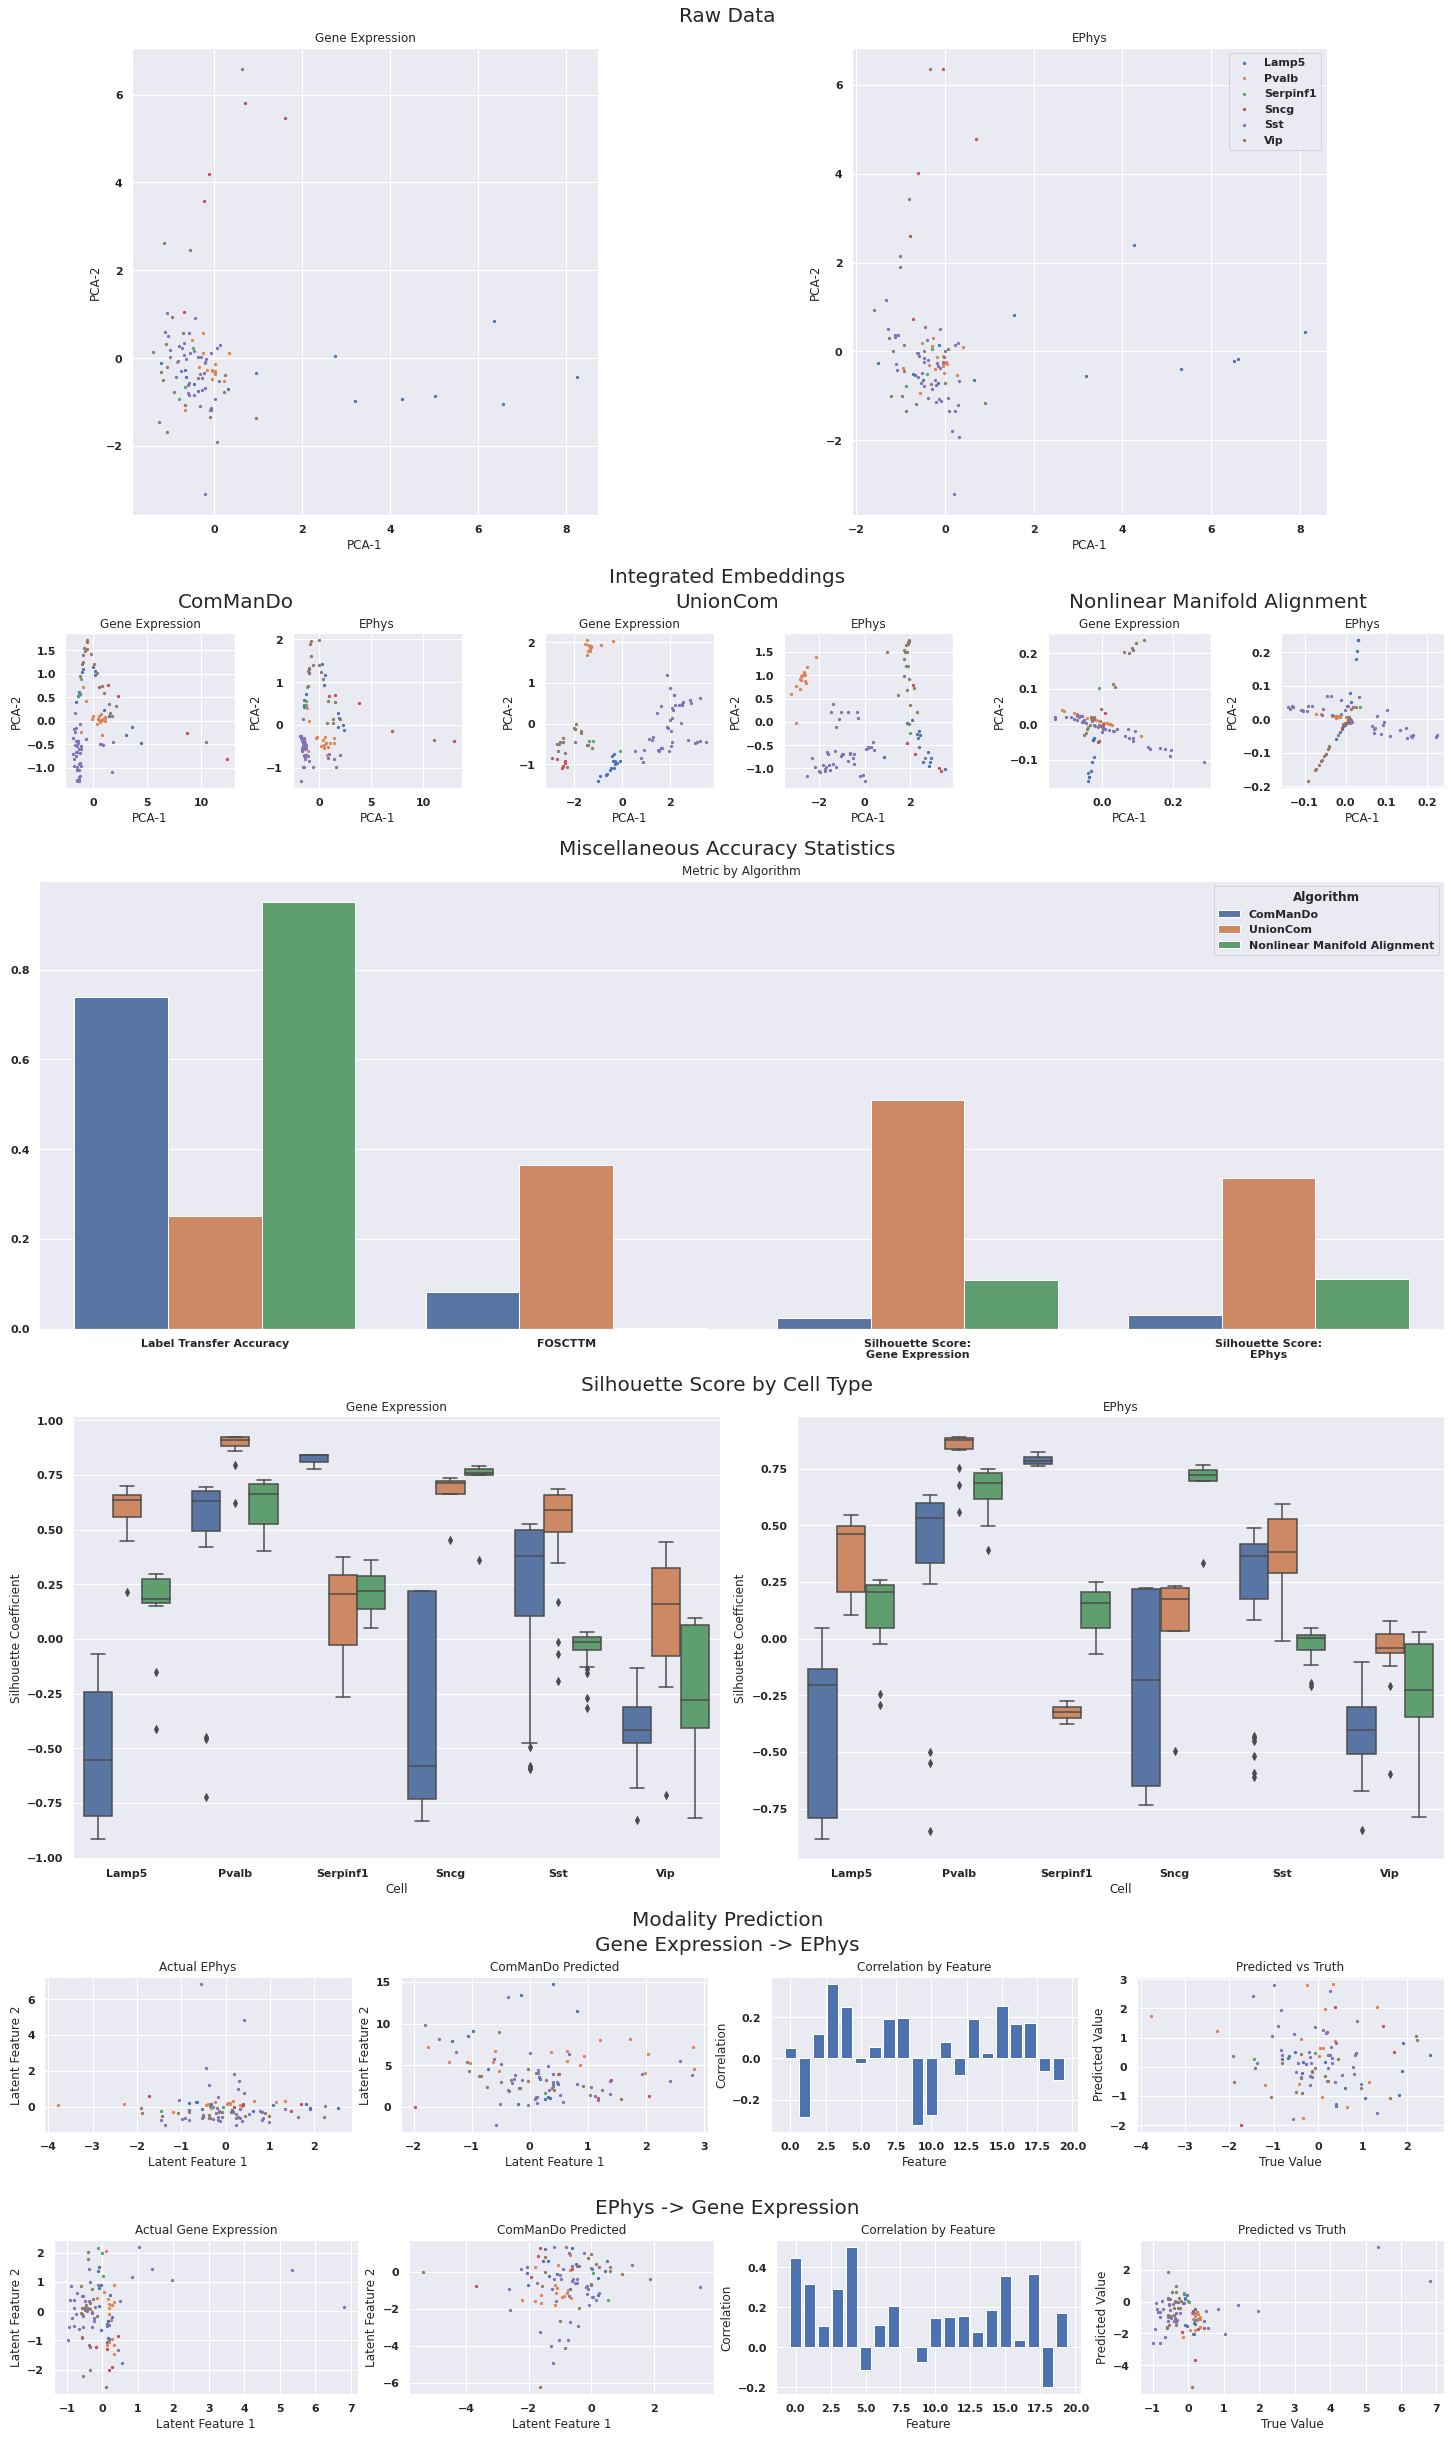

In [8]:
params = {
    'dataset_names': ['Gene Expression', 'EPhys'],
    'alg_results': [uc_data, nl_data],
    'alg_names': ['UnionCom', 'Nonlinear Manifold Alignment'],
    'scale': 20,
    'reconstruction_features': {(0, 1): [12, 3], (1, 0): [3, 19]},
    'integrated_use_pca': True,
    'skip_partial': True,
    'skip_nn': True,
}
generate_figure(cm, cm_data, dataset, labels, **params)